Загрузка данных и просмотр первых строк

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Загрузка данных
df = pd.read_csv('Walmart_Sales_clean.csv')
print(df.head())  # первые 5 строк

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


Проверка уникальных значений

In [88]:
unique_dates = df['Date'].nunique()
print('Уникальных дат:', unique_dates)

Уникальных дат: 143


Формирование нового датасета

In [89]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Month'] = df['Date'].dt.strftime('%B')
print(df[['Date', 'Month']].head())

        Date     Month
0 2010-02-05  February
1 2010-02-12  February
2 2010-02-19  February
3 2010-02-26  February
4 2010-03-05     March


Построение облака слов на основе «сырых данных»

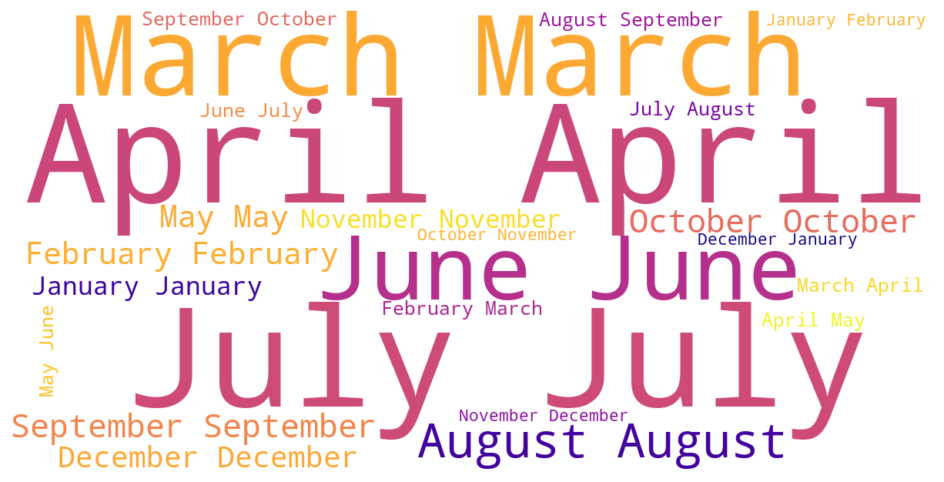

In [90]:
# Преобразуем Date в datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Выделим только месяц (словами)
df['MonthName'] = df['Date'].dt.strftime('%B')

# Объединим в одну строку
text_months = " ".join(df['MonthName'].tolist())

# Облако слов по месяцам
cloud_months = WordCloud(
    width=1200, 
    height=600, 
    background_color='white',
    colormap='plasma'
).generate(text_months)

plt.figure(figsize=(12,6))
plt.imshow(cloud_months, interpolation='bilinear')
plt.axis('off')
plt.show()


Обработка данных: группировка по месяцам

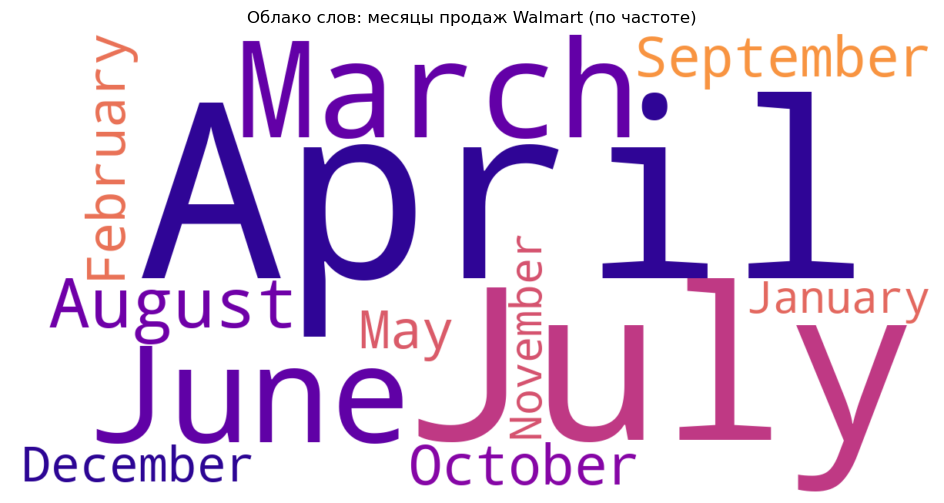

In [95]:

# Считаем частоту по месяцам
month_counts = df['MonthName'].value_counts().to_dict()

# Строим облако слов из частот
cloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='plasma'
).generate_from_frequencies(month_counts)

plt.figure(figsize=(12,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Облако слов: месяцы продаж Walmart (по частоте)")
plt.show()
